---   
<img align="left" width="110"   src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"> 
<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Neural Networks From Scratch in Python</h1>

---  

<h3 align="right"> Muhammad Sheraz (Data Scientist)</h3>
<h1 align="center"> Lec 3 (Activation Functions)</h1>

<div width='100%'>
<img  width='33%' float='left' src='Images/sigmoid1.png'>
<img   width='33%' float='left' src='Images/softmax.jpg'>
<img    width='33%' float='left' src='Images/softmax.jpg'>
<img  width='33%' float='left' src='Images/sigmoid.png'>
<img   width='33%' float='left' src='Images/softmax1.png'>
<img    width='33%' float='left' src='Images/softmax1.png'>
</div>

## ReLU Activation Function
<img align='right' src='Images/relu.jpg'>

- ReLU stands for Rectified Linear Unit.
- It is a `non-linear activation function` widely used in neural networks.
- Mathematically, ReLU is defined as `f(x) = max(0, x)`,which means it `returns 0` for any negative input and the input value for any positive input.

### Advantages
- ReLU is computationally efficient and helps in addressing the `vanishing gradient problem` during training.
- One of its main advantages is that it introduces sparsity in the network by setting negative values to zero, which can help prevent `overfitting`.
- ReLU is often used in hidden layers of neural networks, especially in deep learning architectures.

### Disadvantages
- Despite its advantages, ReLU can suffer from the `dying ReLU` problem where neurons may become inactive and permanently output zero for any input.
- To address the dying ReLU problem, variants such as `Leaky ReLU` and `Parametric ReLU` have been introduced.


In [1]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    if i > 0 :
        output.append(i)
    else :
        output.append( 0 )
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [2]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    output.append( max ( 0 , i))
print (output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [3]:
import numpy as np
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = np.maximum( 0 , inputs)
print (output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


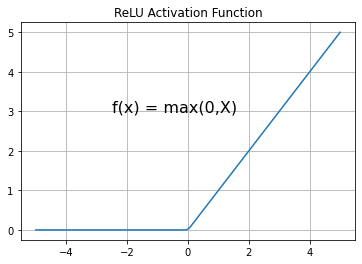

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x_values = np.linspace(-5, 5, 100)
y_values = relu(x_values)
plt.plot(x_values, y_values, label='ReLU Function')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.annotate('f(x) = max(0,X)', xy=(-2.5,3),fontsize=16)
plt.show()

In [10]:
class Layer_Dense :
    def __init__ ( self , n_inputs , n_neurons ):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
    def forward ( self , inputs ):
        self.output = np.dot(inputs, self.weights) + self.biases


In [11]:
class Activation_ReLU :
    def forward ( self , inputs ):
        self.output = np.maximum( 0 , inputs)

In [12]:
from nnfs.datasets import spiral_data

In [13]:
X, y = spiral_data( samples = 100 , classes = 3 )

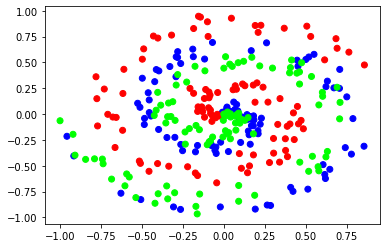

In [14]:
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

In [15]:
dense1 = Layer_Dense( 2 , 3 )
activation1 = Activation_ReLU()
dense1.forward(X)

In [16]:
dense1.output[: 5 ]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.06386665e-04,  6.37645329e-05,  8.03613170e-05],
       [-2.03263791e-04,  1.17136687e-04,  1.36748842e-04],
       [-3.54277348e-04,  2.73547082e-04,  4.86605052e-04],
       [-3.87365398e-04,  3.43950177e-04,  6.92544186e-04]])

In [17]:
activation1.forward(dense1.output)

In [18]:
activation1.output[: 5 ]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.37645329e-05, 8.03613170e-05],
       [0.00000000e+00, 1.17136687e-04, 1.36748842e-04],
       [0.00000000e+00, 2.73547082e-04, 4.86605052e-04],
       [0.00000000e+00, 3.43950177e-04, 6.92544186e-04]])

> **As you can see, negative values have been clipped (modified to be zero). That’s all there is to the
rectified linear activation function used in the hidden layer.**

## Softmax Activation Function

<img align='right' src='Images/softmax.jpg'>

- Softmax is a `non-linear activation function` commonly used in `classification problems` in neural networks.
- Mathematically, softmax is defined as the exponential of each input divided by the sum of all exponentials in the input vector. This can be represented as:

   <img align='center' src='Images/softmax1.png'>

### Advantages

- Softmax function normalizes the output into a `probability distribution`, ensuring that the output values are between `0` and `1` and sum up to `1`.
- It is useful for `multi-class classification` tasks as it provides the probability distribution over multiple classes.

  
### Disadvantages

- Softmax function can suffer from `numerical instability`, especially when dealing with large input values, which can lead to `overflow` or `underflow` issues.
- It is sensitive to `outliers` in the input data, which can affect the model's predictions.
- Softmax outputs are `not robust` to changes in input scale, as small changes in the input can lead to significant changes in the output probabilities.

### Explaination
- Softmax transforms uncalibrated inputs into a probability distribution.
- The `output` of Softmax represents `confidence scores` for each class.
- The predicted class is associated with the highest confidence score.
- Confidence scores sum up to `1`, providing context for predictions.
- `Lower confidence` scores may indicate `uncertainty` in predictions.

### Non-normalized or uncalibrated inputs
- Non-normalized or uncalibrated inputs refer to raw data that hasn't been `transformed` or `standardized`.
- In the context of neural networks, this means the input values haven't been adjusted or `scaled` to a specific range or distribution.
- For example, `pixel values` in `images` ranging from `0 to 255` are considered uncalibrated inputs.
- In Softmax activation, uncalibrated inputs are typically `raw scores or logits` from the previous layer.
- These scores may have arbitrary values and are not directly `interpretable` as probabilities.
- Softmax transforms these uncalibrated inputs into a probability distribution by `exponentiating` and normalizing them.
- This transformation allows the model to `output` probabilities representing the `likelihood` of each class.


In [19]:
import math
layer_outputs = [ 4.8 , 1.21 , 2.385 ]
E = math.e
E = 2.71828182846 
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output) 
print ( 'exponentiated values:' )
print (exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


### Now normalize values

In [20]:
norm_base = sum (exp_values) # We sum all values
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print ('Normalized exponentiated values:' )
print (norm_values)
print ('Sum of normalized values:' , sum (norm_values))

Normalized exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized values: 1.0


- The `exponential function` is `monotonic`, meaning higher input values result in higher outputs, ensuring non-negative values.
- Exponentiation adds stability to the result by focusing more on the `difference` between numbers than their `magnitudes`.
- After exponentiation, we aim to convert the numbers into a probability distribution, representing confidences for each class.
- This involves `normalization`, where each value is divided by the sum of all values, ensuring they add up to `1`.

In [21]:
import numpy as np
layer_outputs = [ 4.8 , 1.21 , 2.385 ]
exp_values = np.exp(layer_outputs)
print ( 'exponentiated values:' )
print (exp_values)
norm_values = exp_values / np.sum(exp_values)
print ( 'normalized exponentiated values:' )
print (norm_values)
print ( 'sum of normalized values:' , np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [22]:
import numpy as np
layer_outputs = np.array([[ 4.8 , 1.21 , 2.385 ],
                        [ 8.9 , - 1.81 , 0.2 ],
                        [ 1.41 , 1.051 , 0.026 ]])

print ( 'Sum without axis' )
print (np.sum(layer_outputs))
print ( 'This will be identical to the above since default is None:' )
print (np.sum(layer_outputs, axis = None ))

Sum without axis
18.172
This will be identical to the above since default is None:
18.172


In [23]:
import numpy as np
layer_outputs = np.array([[ 4.8 , 1.21 , 2.385 ],
                        [ 8.9 , - 1.81 , 0.2 ],
                        [ 1.41 , 1.051 , 0.026 ]])

print ( 'Sum without axis' )
print (np.sum(layer_outputs))
print ( ' matrix == axis 0: columns:' )
print (np.sum(layer_outputs, axis = 0 ))

Sum without axis
18.172
 matrix == axis 0: columns:
[15.11   0.451  2.611]


In [24]:
import numpy as np
layer_outputs = np.array([[ 4.8 , 1.21 , 2.385 ],
                        [ 8.9 , - 1.81 , 0.2 ],
                        [ 1.41 , 1.051 , 0.026 ]])

print ( 'Sum without axis' )
print (np.sum(layer_outputs))
print ( 'Sum axis 1:' )
print (np.sum(layer_outputs, axis = 1 ))

Sum without axis
18.172
Sum axis 1:
[8.395 7.29  2.487]


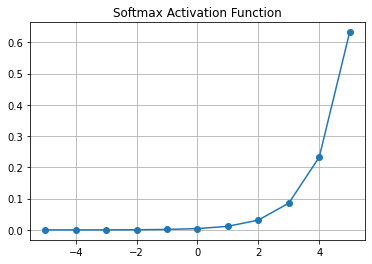

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x_values = np.arange(-5, 6)
y_values = softmax(x_values)
plt.plot(x_values, y_values, marker='o')
plt.title('Softmax Activation Function')
plt.grid(True)
plt.show()

In [46]:
class Activation_Softmax :
    def forward ( self , inputs ):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,keepdims = True ))
        probabilities = exp_values / np.sum(exp_values, axis = 1 ,keepdims = True )
        self.output = probabilities

In [47]:
softmax = Activation_Softmax()
softmax.forward([[ 1 , 2 , 3 ]])
print (softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [48]:
softmax.forward([[ 0.5 , 1 , 1.5 ]])
print (softmax.output)

[[0.18632372 0.30719589 0.50648039]]


In [49]:
X, y = spiral_data( samples = 100 , classes = 3 )

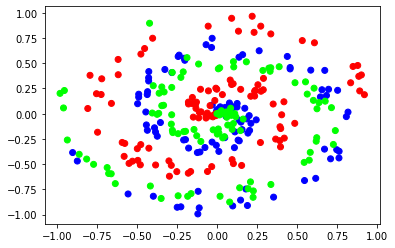

In [50]:
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

In [51]:
dense1 = Layer_Dense( 2 , 3 )
activation1 = Activation_ReLU()
dense2 = Layer_Dense( 3 , 3 )
activation2 = Activation_Softmax()
dense1.forward(X)

In [52]:
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.01352258e-05, -1.31072957e-04,  4.92464505e-05],
       [-9.01337553e-06, -2.46522236e-04,  1.08242771e-04],
       [ 7.59740053e-05, -2.31726151e-04,  2.33008264e-04],
       [ 6.09663025e-05, -3.74705741e-04,  2.80585641e-04]])

In [53]:
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

In [54]:
activation1.output[: 5 ]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.92464505e-05],
       [0.00000000e+00, 0.00000000e+00, 1.08242771e-04],
       [7.59740053e-05, 0.00000000e+00, 2.33008264e-04],
       [6.09663025e-05, 0.00000000e+00, 2.80585641e-04]])

In [55]:
activation2.output[: 5 ]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333338, 0.33333335, 0.33333327],
       [0.33333345, 0.33333336, 0.33333319],
       [0.3333336 , 0.33333344, 0.33333297],
       [0.33333364, 0.33333344, 0.33333292]])

- The distribution of predictions is almost equal, with approximately 33% predictions for each class.
- This uniform distribution results from the random initialization of weights and zeroed biases.
- These predictions are also known as "confidence scores."
- To determine the predicted class, an argmax operation is performed on these confidence scores.
- The argmax function returns the index of the class with the highest confidence score.
- The confidence score can be as important as the predicted class itself in assessing the reliability of the prediction.
- For example, the argmax of [0.22, 0.6, 0.18] is the same as the argmax for [0.32, 0.36, 0.32], both resulting in an index value of 1.
- However, a higher confidence score (e.g., 60%) is generally considered more reliable than a lower confidence score (e.g., 36%).


In [56]:
class Layer_Dense :
    def __init__ ( self , n_inputs , n_neurons ):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
    def forward ( self , inputs ):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_Softmax :
    def forward ( self , inputs ):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,keepdims = True ))
        probabilities = exp_values / np.sum(exp_values, axis = 1 ,keepdims = True )
        self.output = probabilities

class Activation_ReLU :
    def forward ( self , inputs ):
        self.output = np.maximum( 0 , inputs)



In [57]:
X, y = spiral_data( samples = 100 , classes = 3 )

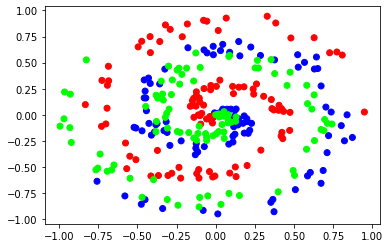

In [58]:
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

In [59]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [60]:
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
activation2.output[:5]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333349, 0.33333318],
       [0.33333333, 0.33333363, 0.33333304],
       [0.33333333, 0.33333359, 0.33333309],
       [0.33333333, 0.3333336 , 0.33333308]])

## Sigmoid Activation Function
<img align='right' src='Images/sigmoid1.png'>

- Sigmoid is a `non-linear activation function` widely used in neural networks.
- It squashes input values into the range of 0 to 1.
- Mathematically, Sigmoid is defined as:

   <img align='center' src='Images/sigmoid.png'>

- transforming any real-valued input to a value between 0 and 1.

### Advantages
- Sigmoid provides smooth outputs, making it suitable for tasks where the output needs to be well-behaved and interpretable.
- It is commonly used in the output layer of binary classification tasks, where it represents the probability of belonging to one class.

### Disadvantages
- Sigmoid can suffer from the `vanishing gradient problem` for very large or small input values, affecting the training process.
- Sigmoid outputs are not `zero-centered`, making optimization slower, especially in deeper networks.
- Sigmoid saturates and becomes flat for extreme input values, leading to the problem of `gradient saturation` and slowing down the learning process.


In [61]:
import numpy as np

class Sigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

In [62]:
layer_outputs = np.array([[4.8, 1.21, 2.385]])
sigmoid = Sigmoid()
sigmoid.forward(layer_outputs)
sigmoid.output

array([[0.99183743, 0.77029895, 0.9156763 ]])

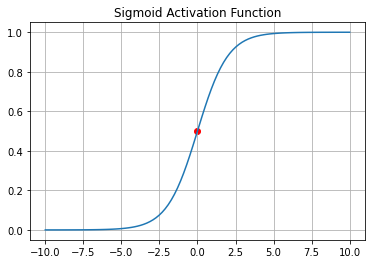

In [63]:
import numpy as np
import matplotlib.pyplot as plt

class Sigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

sigmoid = Sigmoid()
x_values = np.linspace(-10, 10, 100)
sigmoid.forward(x_values)
plt.plot(x_values, sigmoid.output)
plt.title('Sigmoid Activation Function')
plt.scatter([0],[0.5],color='red')
plt.grid(True)
plt.show()